# Import


In [1]:
using JLD
using PyPlot

# 1.1

In [2]:
X = load("clusterData2.jld","X")
include("kMeans.jl")
include("clustering2Dplot.jl");

## 1.1.1.

trial: 1, loss: 60006.2238969557
trial: 2, loss: 60006.2238969557
trial: 3, loss: 67007.676724485
trial: 4, loss: 60006.2238969557
trial: 5, loss: 67007.676724485
trial: 6, loss: 67007.676724485
trial: 7, loss: 60006.2238969557
trial: 8, loss: 59116.2958029581
trial: 9, loss: 67007.676724485
trial: 10, loss: 60006.2238969557
trial: 11, loss: 59541.65183292269
trial: 12, loss: 67007.676724485
trial: 13, loss: 67007.676724485
trial: 14, loss: 67007.676724485
trial: 15, loss: 60006.2238969557
trial: 16, loss: 60006.2238969557
trial: 17, loss: 59116.2958029581
trial: 18, loss: 67007.676724485
trial: 19, loss: 60006.2238969557
trial: 20, loss: 59541.65183292269
trial: 21, loss: 60006.2238969557
trial: 22, loss: 60006.2238969557
trial: 23, loss: 67007.676724485
trial: 24, loss: 67007.676724485
trial: 25, loss: 60006.2238969557
trial: 26, loss: 67007.676724485
trial: 27, loss: 60006.2238969557
trial: 28, loss: 60006.2238969557
trial: 29, loss: 60006.2238969557
trial: 30, loss: 67007.676724485

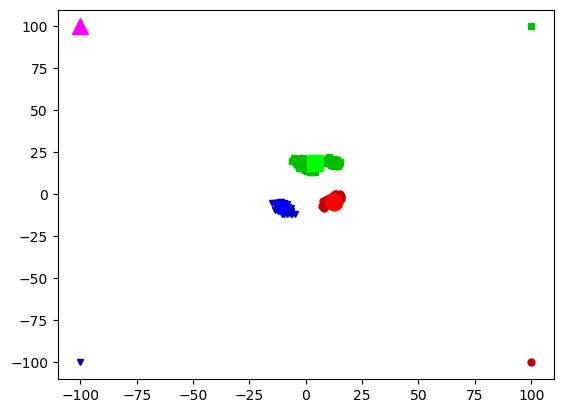

Minimum Loss is 59116.2958029581


In [3]:
# K-means clustering
k = 4
best_model = 1

min_loss = floatmax()

for i in 1:50

    model = kMeans(X,k,doPlot=false);
    y = model.predict(X)
    loss = kMeansError2(X,y,model.W)
    
    println("trial: ", i, ", loss: ", loss)
    
    if loss < min_loss
        min_loss = loss
        best_model = model
    end
end

y = best_model.predict(X)
clustering2Dplot(X,y,best_model.W)

println("Minimum Loss is ", min_loss)

# 1.1.2

In [4]:
# K-means clustering
min_losses = zeros(15)

for k in 1:15
    min_loss = floatmax()

    for i in 1:50

        model = kMeans(X,k,doPlot=false);
        y = model.predict(X)
        loss = kMeansError2(X,y,model.W)
        
        if loss < min_loss
            min_loss = loss
        end
    end
    
    min_losses[k] = min_loss
end


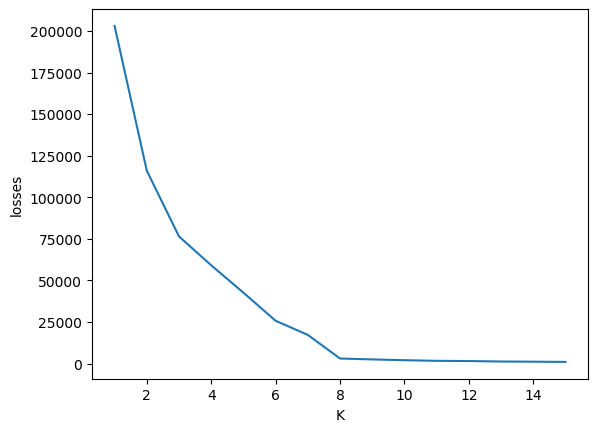

PyObject Text(24.0, 0.5, 'losses')

In [5]:
plot(1:15, min_losses)
xlabel("K")
ylabel("losses")

## 1.1.3

In [6]:
include("kMedians.jl")

kMediansError2 (generic function with 1 method)

trial: 1, loss: 2694.124996873102
trial: 2, loss: 2080.8964257454077
trial: 3, loss: 2694.124996873102
trial: 4, loss: 2080.8964257454077
trial: 5, loss: 2672.388579212299
trial: 6, loss: 2694.124996873102
trial: 7, loss: 2694.124996873102
trial: 8, loss: 2080.8964257454077
trial: 9, loss: 2694.124996873102
trial: 10, loss: 2080.8964257454077
trial: 11, loss: 2080.8964257454077
trial: 12, loss: 2080.8964257454077
trial: 13, loss: 2080.8964257454077
trial: 14, loss: 2753.616165973223
trial: 15, loss: 2754.8843672053977
trial: 16, loss: 2080.8964257454077
trial: 17, loss: 2694.140453218756
trial: 18, loss: 2080.8964257454077
trial: 19, loss: 2694.140453218756
trial: 20, loss: 2753.616165973223
trial: 21, loss: 2694.124996873102
trial: 22, loss: 2080.8964257454077
trial: 23, loss: 2694.140453218756
trial: 24, loss: 2755.2102356530104
trial: 25, loss: 2080.8964257454077
trial: 26, loss: 2755.2102356530104
trial: 27, loss: 2080.8964257454077
trial: 28, loss: 2080.8964257454077
trial: 29, lo

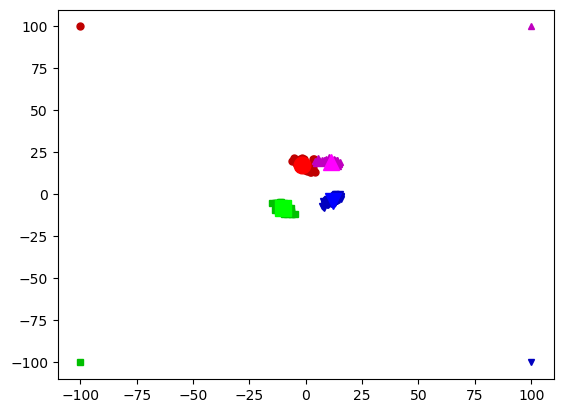

trial: 37, loss: 2080.8964257454077
trial: 38, loss: 2694.124996873102
trial: 39, loss: 2694.140453218756
trial: 40, loss: 2694.124996873102
trial: 41, loss: 2080.8964257454077
trial: 42, loss: 2694.140453218756
trial: 43, loss: 2753.616165973223
trial: 44, loss: 2080.8964257454077
trial: 45, loss: 2080.8964257454077
trial: 46, loss: 2694.140453218756
trial: 47, loss: 2694.124996873102
trial: 48, loss: 2694.124996873102
trial: 49, loss: 2694.124996873102
trial: 50, loss: 2080.8964257454077
Minimum Loss is 2080.8964257454077


In [7]:
# K-Medians clustering
k = 4
best_model = 1

min_loss = floatmax()

for i in 1:50

    model = kMedians(X,k,doPlot=false);
    y = model.predict(X)
    loss = kMediansError2(X,y,model.W)
    
    println("trial: ", i, ", loss: ", loss)
    
    if loss < min_loss
        min_loss = loss
        best_model = model
    end
end

y = best_model.predict(X)
clustering2Dplot(X,y,best_model.W)

println("Minimum Loss is ", min_loss)

## 1.1.4

In [8]:
# K-Median clustering
median_losses = zeros(15)

for k in 1:15
    min_median_loss = floatmax()
    
    for i in 1:50

        model = kMedians(X,k,doPlot=false);
        y = model.predict(X)
        median_loss = kMediansError2(X,y,model.W)
        
        min_median_loss = min(median_loss, min_median_loss)
    end
    
    median_losses[k] = min_median_loss
end


ArgumentError: ArgumentError: median of an empty array is undefined, Float64[]

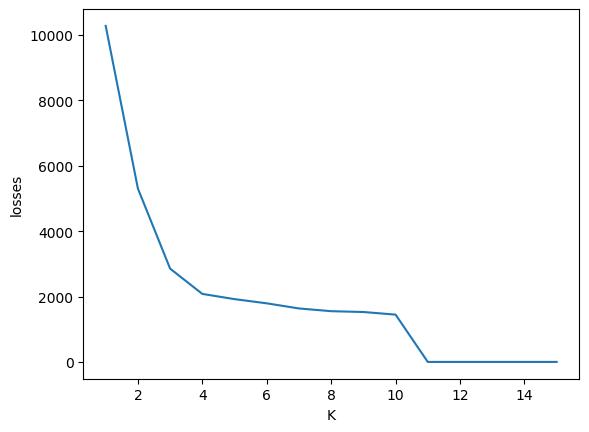

PyObject Text(24.0, 0.5, 'losses')

In [9]:
plot(1:15, median_losses)
xlabel("K")
ylabel("losses")

# 1.2

In [10]:
X = load("clusterData2.jld","X")
include("dbCluster.jl")

expandCluster! (generic function with 1 method)

## 1.2.1 4 cluster

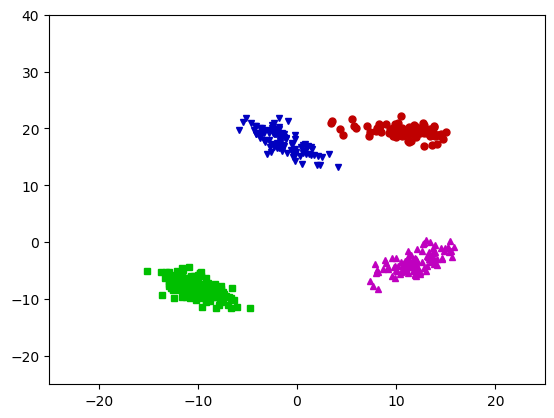

(-25, 40)

In [11]:
# Density-based Clustering
radius = 2
minPts = 3
y = dbCluster(X,radius,minPts,doPlot=true)

subplot(211)
clustering2Dplot(X,y)
xlim(-25, 25)
ylim(-25, 40)

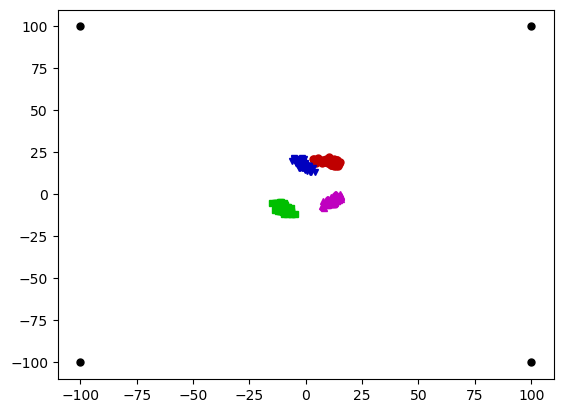

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd76fe747b8>

In [12]:
clustering2Dplot(X,y)


# 1.2.2 3 clustering

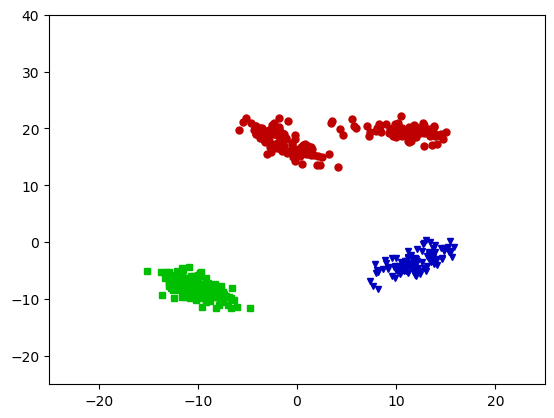

(-25, 40)

In [13]:
# Density-based Clustering
radius = 5
minPts = 3
y = dbCluster(X,radius,minPts,doPlot=true)

clustering2Dplot(X,y)
xlim(-25, 25)
ylim(-25, 40)

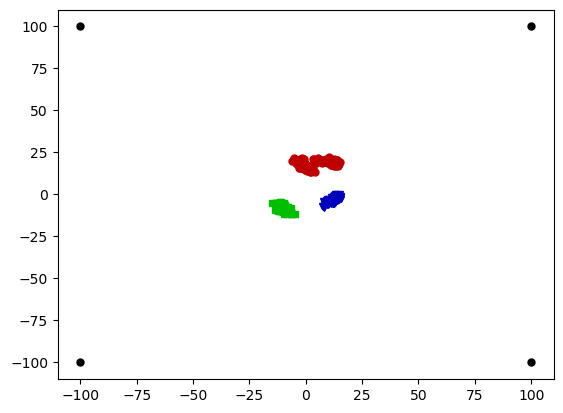

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd76fd910f0>

In [14]:
clustering2Dplot(X,y)


# 1.2.3 2 clustering

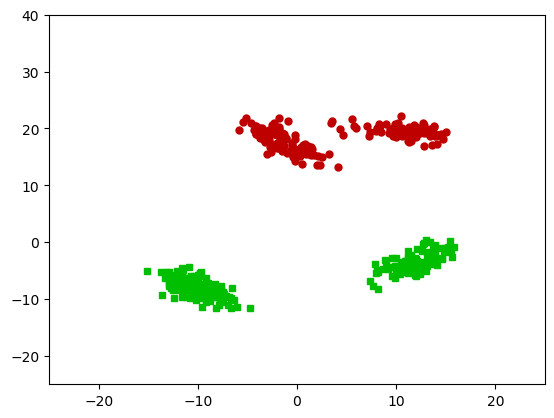

(-25, 40)

In [15]:
# Density-based Clustering
radius = 15
minPts = 3
y = dbCluster(X,radius,minPts,doPlot=true)

clustering2Dplot(X,y)
xlim(-25, 25)
ylim(-25, 40)

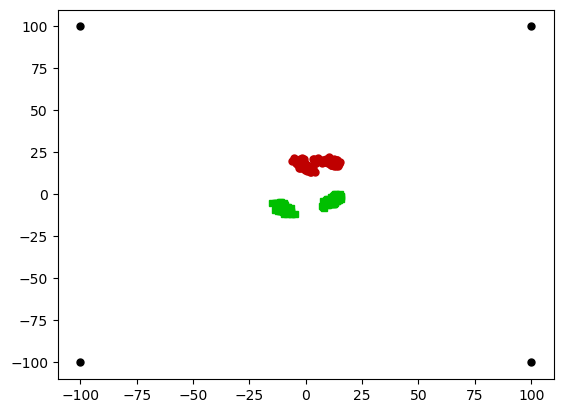

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd76fc70358>

In [16]:
clustering2Dplot(X,y)


# 1.2.4 1 clustering

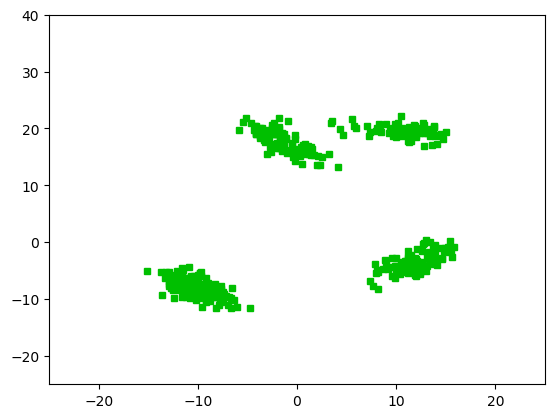

(-25, 40)

In [17]:
# Density-based Clustering
radius = 20
minPts = 3
y = dbCluster(X,radius,minPts,doPlot=true)

clustering2Dplot(X,y)
xlim(-25, 25)
ylim(-25, 40)

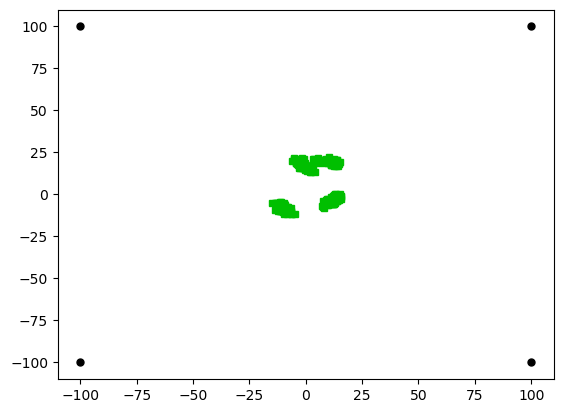

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd76fbcd128>

In [18]:
clustering2Dplot(X,y)
